In [1]:
import os
import shutil
import utilities as rocku
import matplotlib.pyplot as plt
import tomopy
import numpy as np
import pandas as pd
import pprint
import dxchange
from pystackreg import StackReg
import multiprocessing as mp
import timeit
from tqdm import tqdm
from tifffile import TiffFile
ncore = mp.cpu_count()
print("CPU cores:", ncore)

CPU cores: 64


In [2]:
# need to change
ipts="33267"
# scan_type = 'ct_scans'
scan_type = 'radiographs'
# scan_type = 'alignment_calibration'

In [3]:
scan_loc = "/HFIR/CG1D/IPTS-"+ipts+"/raw/" + scan_type
sorted(os.listdir(scan_loc))

['2024_08_12_20CCM',
 '2024_08_12_2CCM',
 '2024_11_01_heat_to_650C',
 '2024_11_01_hold_at_650C',
 '2024_11_01_hold_at_650C_10',
 '2024_11_01_hold_at_650C_11',
 '2024_11_01_hold_at_650C_12',
 '2024_11_01_hold_at_650C_13',
 '2024_11_01_hold_at_650C_14',
 '2024_11_01_hold_at_650C_15',
 '2024_11_01_hold_at_650C_16',
 '2024_11_01_hold_at_650C_17',
 '2024_11_01_hold_at_650C_18',
 '2024_11_01_hold_at_650C_19',
 '2024_11_01_hold_at_650C_2',
 '2024_11_01_hold_at_650C_20',
 '2024_11_01_hold_at_650C_21',
 '2024_11_01_hold_at_650C_22',
 '2024_11_01_hold_at_650C_23',
 '2024_11_01_hold_at_650C_24',
 '2024_11_01_hold_at_650C_25',
 '2024_11_01_hold_at_650C_26',
 '2024_11_01_hold_at_650C_27',
 '2024_11_01_hold_at_650C_29',
 '2024_11_01_hold_at_650C_3',
 '2024_11_01_hold_at_650C_30_DC',
 '2024_11_01_hold_at_650C_30_OB',
 '2024_11_01_hold_at_650C_4',
 '2024_11_01_hold_at_650C_5',
 '2024_11_01_hold_at_650C_6',
 '2024_11_01_hold_at_650C_7',
 '2024_11_01_hold_at_650C_8',
 '2024_11_01_hold_at_650C_9',
 '2024

In [4]:
# ob_loc = "/HFIR/CG1D/IPTS-"+ipts+"/raw/ob"
ob_loc = "/HFIR/CG1D/IPTS-"+ipts+"/raw/radiographs"
sorted(os.listdir(ob_loc))

['2024_08_12_20CCM',
 '2024_08_12_2CCM',
 '2024_11_01_heat_to_650C',
 '2024_11_01_hold_at_650C',
 '2024_11_01_hold_at_650C_10',
 '2024_11_01_hold_at_650C_11',
 '2024_11_01_hold_at_650C_12',
 '2024_11_01_hold_at_650C_13',
 '2024_11_01_hold_at_650C_14',
 '2024_11_01_hold_at_650C_15',
 '2024_11_01_hold_at_650C_16',
 '2024_11_01_hold_at_650C_17',
 '2024_11_01_hold_at_650C_18',
 '2024_11_01_hold_at_650C_19',
 '2024_11_01_hold_at_650C_2',
 '2024_11_01_hold_at_650C_20',
 '2024_11_01_hold_at_650C_21',
 '2024_11_01_hold_at_650C_22',
 '2024_11_01_hold_at_650C_23',
 '2024_11_01_hold_at_650C_24',
 '2024_11_01_hold_at_650C_25',
 '2024_11_01_hold_at_650C_26',
 '2024_11_01_hold_at_650C_27',
 '2024_11_01_hold_at_650C_29',
 '2024_11_01_hold_at_650C_3',
 '2024_11_01_hold_at_650C_30_DC',
 '2024_11_01_hold_at_650C_30_OB',
 '2024_11_01_hold_at_650C_4',
 '2024_11_01_hold_at_650C_5',
 '2024_11_01_hold_at_650C_6',
 '2024_11_01_hold_at_650C_7',
 '2024_11_01_hold_at_650C_8',
 '2024_11_01_hold_at_650C_9',
 '2024

In [5]:
# dc_loc = "/HFIR/CG1D/IPTS-"+ipts+"/raw/dc"
dc_loc = "/HFIR/CG1D/IPTS-"+ipts+"/raw/radiographs"
sorted(os.listdir(dc_loc))

['2024_08_12_20CCM',
 '2024_08_12_2CCM',
 '2024_11_01_heat_to_650C',
 '2024_11_01_hold_at_650C',
 '2024_11_01_hold_at_650C_10',
 '2024_11_01_hold_at_650C_11',
 '2024_11_01_hold_at_650C_12',
 '2024_11_01_hold_at_650C_13',
 '2024_11_01_hold_at_650C_14',
 '2024_11_01_hold_at_650C_15',
 '2024_11_01_hold_at_650C_16',
 '2024_11_01_hold_at_650C_17',
 '2024_11_01_hold_at_650C_18',
 '2024_11_01_hold_at_650C_19',
 '2024_11_01_hold_at_650C_2',
 '2024_11_01_hold_at_650C_20',
 '2024_11_01_hold_at_650C_21',
 '2024_11_01_hold_at_650C_22',
 '2024_11_01_hold_at_650C_23',
 '2024_11_01_hold_at_650C_24',
 '2024_11_01_hold_at_650C_25',
 '2024_11_01_hold_at_650C_26',
 '2024_11_01_hold_at_650C_27',
 '2024_11_01_hold_at_650C_29',
 '2024_11_01_hold_at_650C_3',
 '2024_11_01_hold_at_650C_30_DC',
 '2024_11_01_hold_at_650C_30_OB',
 '2024_11_01_hold_at_650C_4',
 '2024_11_01_hold_at_650C_5',
 '2024_11_01_hold_at_650C_6',
 '2024_11_01_hold_at_650C_7',
 '2024_11_01_hold_at_650C_8',
 '2024_11_01_hold_at_650C_9',
 '2024

In [6]:
###################### need to change start
sample_name = "2024_11_02_hold_to_700C_35"
scan_dir = os.path.join(scan_loc, sample_name)
ob_dir = os.path.join(ob_loc, "2024_11_03_OB_redo")
dc_dir = os.path.join(dc_loc, "2024_11_02_hold_to_700C_35_DC")
###################### need to change end

# Sort and filter scan files

In [7]:
fname_list = os.listdir(scan_dir)
# fname_list.pop(0)
fname_list.sort()
print(len(fname_list))
fname_list

9001


['FLiNaK_2_16mm_71fps_2x2_2p5ccm_0001_0002.tiff',
 'FLiNaK_2_16mm_71fps_2x2_2p5ccm_0001_0003.tiff',
 'FLiNaK_2_16mm_71fps_2x2_2p5ccm_0001_0004.tiff',
 'FLiNaK_2_16mm_71fps_2x2_2p5ccm_0001_0005.tiff',
 'FLiNaK_2_16mm_71fps_2x2_2p5ccm_0001_0006.tiff',
 'FLiNaK_2_16mm_71fps_2x2_2p5ccm_0001_0007.tiff',
 'FLiNaK_2_16mm_71fps_2x2_2p5ccm_0001_0008.tiff',
 'FLiNaK_2_16mm_71fps_2x2_2p5ccm_0001_0009.tiff',
 'FLiNaK_2_16mm_71fps_2x2_2p5ccm_0001_0010.tiff',
 'FLiNaK_2_16mm_71fps_2x2_2p5ccm_0001_0011.tiff',
 'FLiNaK_2_16mm_71fps_2x2_2p5ccm_0001_0012.tiff',
 'FLiNaK_2_16mm_71fps_2x2_2p5ccm_0001_0013.tiff',
 'FLiNaK_2_16mm_71fps_2x2_2p5ccm_0001_0014.tiff',
 'FLiNaK_2_16mm_71fps_2x2_2p5ccm_0001_0015.tiff',
 'FLiNaK_2_16mm_71fps_2x2_2p5ccm_0001_0016.tiff',
 'FLiNaK_2_16mm_71fps_2x2_2p5ccm_0001_0017.tiff',
 'FLiNaK_2_16mm_71fps_2x2_2p5ccm_0001_0018.tiff',
 'FLiNaK_2_16mm_71fps_2x2_2p5ccm_0001_0019.tiff',
 'FLiNaK_2_16mm_71fps_2x2_2p5ccm_0001_0020.tiff',
 'FLiNaK_2_16mm_71fps_2x2_2p5ccm_0001_0021.tiff',


In [8]:
to_rmv = [
]
fname_list = rocku.remove_fnames(fname_list, to_rmv)

9001
9001


In [9]:
ob_list = os.listdir(ob_dir)
# fname_list.pop(0)
ob_list.sort()
print(len(ob_list))
# ob_list = ob_list[:3]
ob_list

1008


['OB_1fps_2x2_0001_0994.tiff',
 'OB_1fps_2x2_0001_0995.tiff',
 'OB_1fps_2x2_0001_0996.tiff',
 'OB_1fps_2x2_0001_0997.tiff',
 'OB_1fps_2x2_0001_0998.tiff',
 'OB_1fps_2x2_0001_0999.tiff',
 'OB_1fps_2x2_0001_1000.tiff',
 'OB_1fps_2x2_0001_1001.tiff',
 'OB_1fps_2x2_0001_1002.tiff',
 'OB_1fps_2x2_0001_1003.tiff',
 'OB_1fps_2x2_0001_1004.tiff',
 'OB_1fps_2x2_0001_1005.tiff',
 'OB_1fps_2x2_0001_1006.tiff',
 'OB_1fps_2x2_0001_1007.tiff',
 'OB_1fps_2x2_0001_1008.tiff',
 'OB_1fps_2x2_0001_1009.tiff',
 'OB_1fps_2x2_0001_1010.tiff',
 'OB_1fps_2x2_0001_1011.tiff',
 'OB_1fps_2x2_0001_1012.tiff',
 'OB_1fps_2x2_0001_1013.tiff',
 'OB_1s_0001_0006.tiff',
 'OB_1s_0001_0007.tiff',
 'OB_1s_0001_0008.tiff',
 'OB_1s_0001_0009.tiff',
 'OB_1s_0001_0010.tiff',
 'OB_1s_0001_0011.tiff',
 'OB_1s_0001_0012.tiff',
 'OB_1s_0001_0013.tiff',
 'OB_1s_0001_0014.tiff',
 'OB_1s_0001_0015.tiff',
 'OB_1s_0001_0016.tiff',
 'OB_1s_0001_0017.tiff',
 'OB_1s_0001_0018.tiff',
 'OB_1s_0001_0019.tiff',
 'OB_1s_0001_0020.tiff',
 'OB_

In [10]:
to_rmv = [
]
ob_list = rocku.remove_fnames(ob_list, to_rmv)
ob_list = rocku.filter_list(ob_list, '_71fps_2x2_')
print(len(ob_list))
ob_list

1008
1008
201


['OB_71fps_2x2_0001_0793.tiff',
 'OB_71fps_2x2_0001_0794.tiff',
 'OB_71fps_2x2_0001_0795.tiff',
 'OB_71fps_2x2_0001_0796.tiff',
 'OB_71fps_2x2_0001_0797.tiff',
 'OB_71fps_2x2_0001_0798.tiff',
 'OB_71fps_2x2_0001_0799.tiff',
 'OB_71fps_2x2_0001_0800.tiff',
 'OB_71fps_2x2_0001_0801.tiff',
 'OB_71fps_2x2_0001_0802.tiff',
 'OB_71fps_2x2_0001_0803.tiff',
 'OB_71fps_2x2_0001_0804.tiff',
 'OB_71fps_2x2_0001_0805.tiff',
 'OB_71fps_2x2_0001_0806.tiff',
 'OB_71fps_2x2_0001_0807.tiff',
 'OB_71fps_2x2_0001_0808.tiff',
 'OB_71fps_2x2_0001_0809.tiff',
 'OB_71fps_2x2_0001_0810.tiff',
 'OB_71fps_2x2_0001_0811.tiff',
 'OB_71fps_2x2_0001_0812.tiff',
 'OB_71fps_2x2_0001_0813.tiff',
 'OB_71fps_2x2_0001_0814.tiff',
 'OB_71fps_2x2_0001_0815.tiff',
 'OB_71fps_2x2_0001_0816.tiff',
 'OB_71fps_2x2_0001_0817.tiff',
 'OB_71fps_2x2_0001_0818.tiff',
 'OB_71fps_2x2_0001_0819.tiff',
 'OB_71fps_2x2_0001_0820.tiff',
 'OB_71fps_2x2_0001_0821.tiff',
 'OB_71fps_2x2_0001_0822.tiff',
 'OB_71fps_2x2_0001_0823.tiff',
 'OB_71f

In [11]:
dc_list = os.listdir(dc_dir)
# fname_list.pop(0)
dc_list.sort()
print(len(dc_list))
dc_list

201


['FLiNaK_2_16mm_71fps_2x2_2p5ccm_0001_0002.tiff',
 'FLiNaK_2_16mm_71fps_2x2_2p5ccm_0001_0003.tiff',
 'FLiNaK_2_16mm_71fps_2x2_2p5ccm_0001_0004.tiff',
 'FLiNaK_2_16mm_71fps_2x2_2p5ccm_0001_0005.tiff',
 'FLiNaK_2_16mm_71fps_2x2_2p5ccm_0001_0006.tiff',
 'FLiNaK_2_16mm_71fps_2x2_2p5ccm_0001_0007.tiff',
 'FLiNaK_2_16mm_71fps_2x2_2p5ccm_0001_0008.tiff',
 'FLiNaK_2_16mm_71fps_2x2_2p5ccm_0001_0009.tiff',
 'FLiNaK_2_16mm_71fps_2x2_2p5ccm_0001_0010.tiff',
 'FLiNaK_2_16mm_71fps_2x2_2p5ccm_0001_0011.tiff',
 'FLiNaK_2_16mm_71fps_2x2_2p5ccm_0001_0012.tiff',
 'FLiNaK_2_16mm_71fps_2x2_2p5ccm_0001_0013.tiff',
 'FLiNaK_2_16mm_71fps_2x2_2p5ccm_0001_0014.tiff',
 'FLiNaK_2_16mm_71fps_2x2_2p5ccm_0001_0015.tiff',
 'FLiNaK_2_16mm_71fps_2x2_2p5ccm_0001_0016.tiff',
 'FLiNaK_2_16mm_71fps_2x2_2p5ccm_0001_0017.tiff',
 'FLiNaK_2_16mm_71fps_2x2_2p5ccm_0001_0018.tiff',
 'FLiNaK_2_16mm_71fps_2x2_2p5ccm_0001_0019.tiff',
 'FLiNaK_2_16mm_71fps_2x2_2p5ccm_0001_0020.tiff',
 'FLiNaK_2_16mm_71fps_2x2_2p5ccm_0001_0021.tiff',


In [12]:
to_rmv = [
]
dc_list = rocku.remove_fnames(dc_list, to_rmv)

201
201


In [13]:
scan_exposure_list = rocku.get_exposure_list(fname_list)
ob_exposure_list = rocku.get_exposure_list(ob_list)
dc_exposure_list = rocku.get_exposure_list(dc_list)
exposure_list = sorted(list(set(scan_exposure_list).intersection(ob_exposure_list).intersection(dc_exposure_list)))
exposure_list

['_0001_']

In [14]:
_fname_list = rocku.filter_list(fname_list, exposure_list[0])
_fname_list

['FLiNaK_2_16mm_71fps_2x2_2p5ccm_0001_0002.tiff',
 'FLiNaK_2_16mm_71fps_2x2_2p5ccm_0001_0003.tiff',
 'FLiNaK_2_16mm_71fps_2x2_2p5ccm_0001_0004.tiff',
 'FLiNaK_2_16mm_71fps_2x2_2p5ccm_0001_0005.tiff',
 'FLiNaK_2_16mm_71fps_2x2_2p5ccm_0001_0006.tiff',
 'FLiNaK_2_16mm_71fps_2x2_2p5ccm_0001_0007.tiff',
 'FLiNaK_2_16mm_71fps_2x2_2p5ccm_0001_0008.tiff',
 'FLiNaK_2_16mm_71fps_2x2_2p5ccm_0001_0009.tiff',
 'FLiNaK_2_16mm_71fps_2x2_2p5ccm_0001_0010.tiff',
 'FLiNaK_2_16mm_71fps_2x2_2p5ccm_0001_0011.tiff',
 'FLiNaK_2_16mm_71fps_2x2_2p5ccm_0001_0012.tiff',
 'FLiNaK_2_16mm_71fps_2x2_2p5ccm_0001_0013.tiff',
 'FLiNaK_2_16mm_71fps_2x2_2p5ccm_0001_0014.tiff',
 'FLiNaK_2_16mm_71fps_2x2_2p5ccm_0001_0015.tiff',
 'FLiNaK_2_16mm_71fps_2x2_2p5ccm_0001_0016.tiff',
 'FLiNaK_2_16mm_71fps_2x2_2p5ccm_0001_0017.tiff',
 'FLiNaK_2_16mm_71fps_2x2_2p5ccm_0001_0018.tiff',
 'FLiNaK_2_16mm_71fps_2x2_2p5ccm_0001_0019.tiff',
 'FLiNaK_2_16mm_71fps_2x2_2p5ccm_0001_0020.tiff',
 'FLiNaK_2_16mm_71fps_2x2_2p5ccm_0001_0021.tiff',


In [15]:
######### Scan
_scan_raw = rocku.read_tiff_stack(scan_dir, [_fname_list[0], _fname_list[-1]])
print(_scan_raw.shape)

2


(2, 1023, 1024)


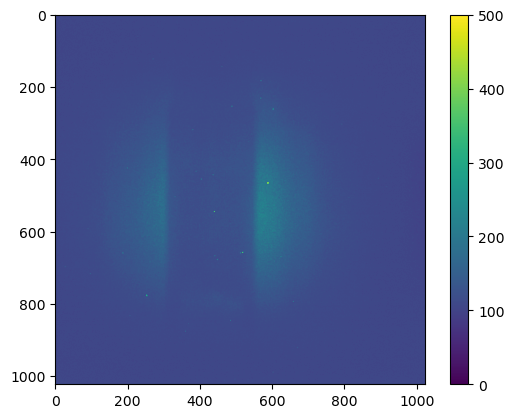

In [17]:
_scan_min = np.min(_scan_raw, axis=0)
plt.imshow(_scan_min, vmin=0, vmax=500)
plt.colorbar()
plt.show()

ROI:


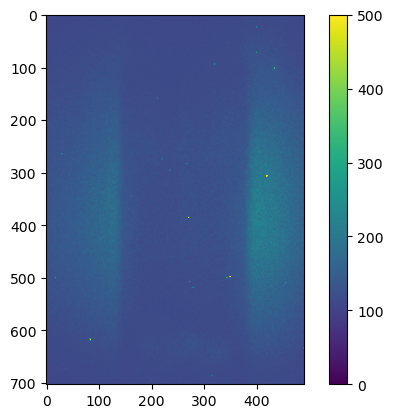

In [19]:
###################### need to change start
crop = True
# crop = False
crop_left = 170#320
crop_right = 660#1080
crop_top = 160
crop_bottom = -160
# crop_left = 550
# crop_right = 1300
# crop_top = 300
# crop_bottom = 1700
###################### need to change end
# scan_crop = rocku.crop(scan_raw, crop_left, crop_right, crop_top, crop_bottom, crop)
# ob_crop = rocku.crop(ob_raw, crop_left, crop_right, crop_top, crop_bottom, crop)
# dc_crop = rocku.crop(dc_raw, crop_left, crop_right, crop_top, crop_bottom, crop)
_scan_crop_min = rocku.crop(_scan_min, crop_left, crop_right, crop_top, crop_bottom, crop)
print("ROI:")
plt.imshow(_scan_crop_min, vmin=0, vmax=500)
plt.colorbar()
plt.show()

# Normalize the selected list

In [21]:
scan_list = sorted(os.listdir(scan_loc))
scan_list

['2024_08_12_20CCM',
 '2024_08_12_2CCM',
 '2024_11_01_heat_to_650C',
 '2024_11_01_hold_at_650C',
 '2024_11_01_hold_at_650C_10',
 '2024_11_01_hold_at_650C_11',
 '2024_11_01_hold_at_650C_12',
 '2024_11_01_hold_at_650C_13',
 '2024_11_01_hold_at_650C_14',
 '2024_11_01_hold_at_650C_15',
 '2024_11_01_hold_at_650C_16',
 '2024_11_01_hold_at_650C_17',
 '2024_11_01_hold_at_650C_18',
 '2024_11_01_hold_at_650C_19',
 '2024_11_01_hold_at_650C_2',
 '2024_11_01_hold_at_650C_20',
 '2024_11_01_hold_at_650C_21',
 '2024_11_01_hold_at_650C_22',
 '2024_11_01_hold_at_650C_23',
 '2024_11_01_hold_at_650C_24',
 '2024_11_01_hold_at_650C_25',
 '2024_11_01_hold_at_650C_26',
 '2024_11_01_hold_at_650C_27',
 '2024_11_01_hold_at_650C_29',
 '2024_11_01_hold_at_650C_3',
 '2024_11_01_hold_at_650C_30_DC',
 '2024_11_01_hold_at_650C_30_OB',
 '2024_11_01_hold_at_650C_4',
 '2024_11_01_hold_at_650C_5',
 '2024_11_01_hold_at_650C_6',
 '2024_11_01_hold_at_650C_7',
 '2024_11_01_hold_at_650C_8',
 '2024_11_01_hold_at_650C_9',
 '2024

In [22]:
to_rmv = [
    '2024_08_12_20CCM',
 '2024_08_12_2CCM',
 '2024_11_01_heat_to_650C',
 '2024_11_01_hold_at_650C',
 '2024_11_01_hold_at_650C_10',
 '2024_11_01_hold_at_650C_11',
 '2024_11_01_hold_at_650C_12',
 '2024_11_01_hold_at_650C_13',
 '2024_11_01_hold_at_650C_14',
 '2024_11_01_hold_at_650C_15',
 '2024_11_01_hold_at_650C_16',
 '2024_11_01_hold_at_650C_17',
 '2024_11_01_hold_at_650C_18',
 '2024_11_01_hold_at_650C_19',
 '2024_11_01_hold_at_650C_2',
 '2024_11_01_hold_at_650C_20',
 '2024_11_01_hold_at_650C_21',
 '2024_11_01_hold_at_650C_22',
 '2024_11_01_hold_at_650C_23',
 '2024_11_01_hold_at_650C_24',
 '2024_11_01_hold_at_650C_25',
 '2024_11_01_hold_at_650C_26',
 '2024_11_01_hold_at_650C_27',
 '2024_11_01_hold_at_650C_29',
 '2024_11_01_hold_at_650C_3',
 '2024_11_01_hold_at_650C_30_DC',
 '2024_11_01_hold_at_650C_30_OB',
 '2024_11_01_hold_at_650C_4',
 '2024_11_01_hold_at_650C_5',
 '2024_11_01_hold_at_650C_6',
 '2024_11_01_hold_at_650C_7',
 '2024_11_01_hold_at_650C_8',
 '2024_11_01_hold_at_650C_9',
 '2024_11_01_preheat',
]
scan_list = rocku.remove_fnames(scan_list, to_rmv)
scan_list

75
41


['2024_11_02_heating_to_650C',
 '2024_11_02_heating_to_650C_DC',
 '2024_11_02_heating_to_650C_OB',
 '2024_11_02_heating_to_700C',
 '2024_11_02_hold_to_700C',
 '2024_11_02_hold_to_700C_10',
 '2024_11_02_hold_to_700C_11',
 '2024_11_02_hold_to_700C_12',
 '2024_11_02_hold_to_700C_13',
 '2024_11_02_hold_to_700C_14',
 '2024_11_02_hold_to_700C_15',
 '2024_11_02_hold_to_700C_16',
 '2024_11_02_hold_to_700C_17',
 '2024_11_02_hold_to_700C_18',
 '2024_11_02_hold_to_700C_19',
 '2024_11_02_hold_to_700C_20',
 '2024_11_02_hold_to_700C_21',
 '2024_11_02_hold_to_700C_22',
 '2024_11_02_hold_to_700C_23',
 '2024_11_02_hold_to_700C_24',
 '2024_11_02_hold_to_700C_25',
 '2024_11_02_hold_to_700C_26',
 '2024_11_02_hold_to_700C_27',
 '2024_11_02_hold_to_700C_28',
 '2024_11_02_hold_to_700C_29',
 '2024_11_02_hold_to_700C_3',
 '2024_11_02_hold_to_700C_30',
 '2024_11_02_hold_to_700C_31',
 '2024_11_02_hold_to_700C_32',
 '2024_11_02_hold_to_700C_33',
 '2024_11_02_hold_to_700C_34',
 '2024_11_02_hold_to_700C_35',
 '2024

In [23]:
to_rmv = [
    '2024_11_02_heating_to_650C_DC',
    '2024_11_02_heating_to_650C_OB',
    '2024_11_02_hold_to_700C_35_DC',
    '2024_11_03_OB',
    '2024_11_03_OB_redo'
]
scan_list = rocku.remove_fnames(scan_list, to_rmv)
scan_list

41
36


['2024_11_02_heating_to_650C',
 '2024_11_02_heating_to_700C',
 '2024_11_02_hold_to_700C',
 '2024_11_02_hold_to_700C_10',
 '2024_11_02_hold_to_700C_11',
 '2024_11_02_hold_to_700C_12',
 '2024_11_02_hold_to_700C_13',
 '2024_11_02_hold_to_700C_14',
 '2024_11_02_hold_to_700C_15',
 '2024_11_02_hold_to_700C_16',
 '2024_11_02_hold_to_700C_17',
 '2024_11_02_hold_to_700C_18',
 '2024_11_02_hold_to_700C_19',
 '2024_11_02_hold_to_700C_20',
 '2024_11_02_hold_to_700C_21',
 '2024_11_02_hold_to_700C_22',
 '2024_11_02_hold_to_700C_23',
 '2024_11_02_hold_to_700C_24',
 '2024_11_02_hold_to_700C_25',
 '2024_11_02_hold_to_700C_26',
 '2024_11_02_hold_to_700C_27',
 '2024_11_02_hold_to_700C_28',
 '2024_11_02_hold_to_700C_29',
 '2024_11_02_hold_to_700C_3',
 '2024_11_02_hold_to_700C_30',
 '2024_11_02_hold_to_700C_31',
 '2024_11_02_hold_to_700C_32',
 '2024_11_02_hold_to_700C_33',
 '2024_11_02_hold_to_700C_34',
 '2024_11_02_hold_to_700C_35',
 '2024_11_02_hold_to_700C_4',
 '2024_11_02_hold_to_700C_5',
 '2024_11_02_h

In [24]:
to_rmv = [
    '2024_11_02_heating_to_650C',
    '2024_11_02_heating_to_700C',
    '2024_11_02_hold_to_700C',
    '2024_11_02_hold_to_700C_3',
    '2024_11_02_hold_to_700C_4',
 '2024_11_02_hold_to_700C_5',
 '2024_11_02_hold_to_700C_6',
 '2024_11_02_hold_to_700C_7',
 '2024_11_02_hold_to_700C_8',
 '2024_11_02_hold_to_700C_9',
     '2024_11_02_hold_to_700C_10',
]
scan_list = rocku.remove_fnames(scan_list, to_rmv)
# scan_list = rocku.filter_list(scan_list, '_heating_to_')
scan_list

36
25


['2024_11_02_hold_to_700C_11',
 '2024_11_02_hold_to_700C_12',
 '2024_11_02_hold_to_700C_13',
 '2024_11_02_hold_to_700C_14',
 '2024_11_02_hold_to_700C_15',
 '2024_11_02_hold_to_700C_16',
 '2024_11_02_hold_to_700C_17',
 '2024_11_02_hold_to_700C_18',
 '2024_11_02_hold_to_700C_19',
 '2024_11_02_hold_to_700C_20',
 '2024_11_02_hold_to_700C_21',
 '2024_11_02_hold_to_700C_22',
 '2024_11_02_hold_to_700C_23',
 '2024_11_02_hold_to_700C_24',
 '2024_11_02_hold_to_700C_25',
 '2024_11_02_hold_to_700C_26',
 '2024_11_02_hold_to_700C_27',
 '2024_11_02_hold_to_700C_28',
 '2024_11_02_hold_to_700C_29',
 '2024_11_02_hold_to_700C_30',
 '2024_11_02_hold_to_700C_31',
 '2024_11_02_hold_to_700C_32',
 '2024_11_02_hold_to_700C_33',
 '2024_11_02_hold_to_700C_34',
 '2024_11_02_hold_to_700C_35']

In [25]:
to_rmv = [
    # '2024_10_18_2p1_3_bee_noCollimator',
 # '2024_10_18_2p1_3_waterwedge_Collimator_p1rpm',
]
scan_list = rocku.remove_fnames(scan_list, to_rmv)
scan_list

25
25


['2024_11_02_hold_to_700C_11',
 '2024_11_02_hold_to_700C_12',
 '2024_11_02_hold_to_700C_13',
 '2024_11_02_hold_to_700C_14',
 '2024_11_02_hold_to_700C_15',
 '2024_11_02_hold_to_700C_16',
 '2024_11_02_hold_to_700C_17',
 '2024_11_02_hold_to_700C_18',
 '2024_11_02_hold_to_700C_19',
 '2024_11_02_hold_to_700C_20',
 '2024_11_02_hold_to_700C_21',
 '2024_11_02_hold_to_700C_22',
 '2024_11_02_hold_to_700C_23',
 '2024_11_02_hold_to_700C_24',
 '2024_11_02_hold_to_700C_25',
 '2024_11_02_hold_to_700C_26',
 '2024_11_02_hold_to_700C_27',
 '2024_11_02_hold_to_700C_28',
 '2024_11_02_hold_to_700C_29',
 '2024_11_02_hold_to_700C_30',
 '2024_11_02_hold_to_700C_31',
 '2024_11_02_hold_to_700C_32',
 '2024_11_02_hold_to_700C_33',
 '2024_11_02_hold_to_700C_34',
 '2024_11_02_hold_to_700C_35']

In [26]:
# ignore_dc = True
ignore_dc = False
outlier_rmv_size = 6
gamma_diff_raw = 20
gamma_diff_norm = 0.2
##################################################
for each_scan in scan_list:
    scan_dir = os.path.join(scan_loc, each_scan)
    fname_list = sorted(os.listdir(scan_dir))
    scan_exposure_list = rocku.get_exposure_list(fname_list)
    exposure_list = sorted(list(set(scan_exposure_list).intersection(ob_exposure_list).intersection(dc_exposure_list)))
    save_to = "/HFIR/CG1D/IPTS-"+ipts+"/shared/processed_data/normalized/" + each_scan# + '_Right'
    print("######################### Normalizing and saving to: '{}'".format(save_to))
    for each_exposure in exposure_list:
        if len(exposure_list) > 1:
            print("##### Exposure time: {}".format(each_exposure))
        _fname_list = rocku.filter_list(fname_list, each_exposure)
        _ob_list = rocku.filter_list(ob_list, each_exposure)
        _dc_list = rocku.filter_list(dc_list, each_exposure)
        ######### OB
        _ob_raw = rocku.read_tiff_stack(ob_dir, _ob_list)
        print(_ob_raw.shape)
        _ob_crop = rocku.crop(_ob_raw, crop_left, crop_right, crop_top, crop_bottom, crop)
        _ob_crop = tomopy.misc.corr.remove_outlier_cuda(_ob_crop, gamma_diff_raw).astype(np.ushort)
        ######### DC
        _dc_raw = rocku.read_tiff_stack(dc_dir, _dc_list)
        print(_dc_raw.shape)
        _scan_raw = dxchange.read_tiff(os.path.join(scan_dir, _fname_list[0]))
        _scan_crop = rocku.crop(_scan_raw, crop_left, crop_right, crop_top, crop_bottom, crop)
        if not ignore_dc:
            _dc_crop = rocku.crop(_dc_raw, crop_left, crop_right, crop_top, crop_bottom, crop)
            _dc_crop = tomopy.remove_outlier(_dc_crop, gamma_diff_raw, size=outlier_rmv_size).astype(np.ushort)
            _scan_crop, _ob_mi_dc, _dc_med = rocku.subtract_dc(_scan_crop, _ob_crop, _dc_crop)
            # _dc_med = _dc_med - 2
        else:
            _scan_crop, _ob_mi_dc, _dc_med = rocku.subtract_dc(_scan_crop, _ob_crop, None)
        ######### Scan
        for each_f in tqdm(_fname_list):
            _scan_raw = dxchange.read_tiff(os.path.join(scan_dir, each_f))
            # print(_scan_raw.shape)
            _scan_crop = rocku.crop(_scan_raw, crop_left, crop_right, crop_top, crop_bottom, crop)
            _scan_crop = tomopy.remove_outlier(_scan_crop, gamma_diff_raw, size=outlier_rmv_size).astype(np.ushort)
            if not ignore_dc:
                _scan_mi_dc = _scan_crop - _dc_med 
            else:
                _scan_mi_dc = _scan_crop[:]
            _scan_norm = np.true_divide(_scan_mi_dc, _ob_mi_dc, dtype=np.float32)
            _scan_norm = tomopy.remove_outlier(_scan_norm, gamma_diff_norm, size=outlier_rmv_size)
            _scan_norm = tomopy.remove_nan(_scan_norm)
            _scan_norm = tomopy.remove_neg(_scan_norm)
            # _scan_norm = np.clip(_scan_norm, a_min=-0.1, a_max=1.1)
            _scan_norm = np.flipud(_scan_norm)
            # _scan_norm, _scan_mi_dc, _ob_mi_dc, _dc_med = rocku.normalize(_scan_crop, _ob_crop, _dc_crop)
            # Save files
            save_to_fname = save_to + "/" + each_f
            dxchange.write_tiff(_scan_norm, fname=save_to_fname, overwrite=True)

######################### Normalizing and saving to: '/HFIR/CG1D/IPTS-33267/shared/processed_data/normalized/2024_11_02_hold_to_700C_11'
201


/SNS/users/y9z/miniconda3/envs/rockit/lib/python3.10/site-packages/tomopy/misc/corr.py:747: UserWarning: The tomocuda is not support, using cpu outlier removal
  warnings.warn("The tomocuda is not support, using cpu outlier removal")


(201, 1023, 1024)
201


(201, 1023, 1024)
OB stack combined by median.
DC stack combined by median.


  0%|                                                                                    | 0/9001 [00:00<?, ?it/s]/tmp/ipykernel_3225790/3481533440.py:45: RuntimeWarning: divide by zero encountered in divide
  _scan_norm = np.true_divide(_scan_mi_dc, _ob_mi_dc, dtype=np.float32)
/tmp/ipykernel_3225790/3481533440.py:45: RuntimeWarning: invalid value encountered in divide
  _scan_norm = np.true_divide(_scan_mi_dc, _ob_mi_dc, dtype=np.float32)
100%|█████████████████████████████████████████████████████████████████████████| 9001/9001 [11:57<00:00, 12.54it/s]


######################### Normalizing and saving to: '/HFIR/CG1D/IPTS-33267/shared/processed_data/normalized/2024_11_02_hold_to_700C_12'
201


(201, 1023, 1024)
201


(201, 1023, 1024)
OB stack combined by median.
DC stack combined by median.


100%|█████████████████████████████████████████████████████████████████████████| 4449/4449 [06:38<00:00, 11.16it/s]


######################### Normalizing and saving to: '/HFIR/CG1D/IPTS-33267/shared/processed_data/normalized/2024_11_02_hold_to_700C_13'
201


(201, 1023, 1024)
201


(201, 1023, 1024)
OB stack combined by median.
DC stack combined by median.


100%|█████████████████████████████████████████████████████████████████████████| 9000/9000 [12:05<00:00, 12.41it/s]


######################### Normalizing and saving to: '/HFIR/CG1D/IPTS-33267/shared/processed_data/normalized/2024_11_02_hold_to_700C_14'
201


(201, 1023, 1024)
201


(201, 1023, 1024)
OB stack combined by median.
DC stack combined by median.


100%|█████████████████████████████████████████████████████████████████████████| 9001/9001 [14:00<00:00, 10.71it/s]


######################### Normalizing and saving to: '/HFIR/CG1D/IPTS-33267/shared/processed_data/normalized/2024_11_02_hold_to_700C_15'
201


(201, 1023, 1024)
201


(201, 1023, 1024)
OB stack combined by median.
DC stack combined by median.


100%|█████████████████████████████████████████████████████████████████████████| 9002/9002 [12:57<00:00, 11.57it/s]


######################### Normalizing and saving to: '/HFIR/CG1D/IPTS-33267/shared/processed_data/normalized/2024_11_02_hold_to_700C_16'
201


(201, 1023, 1024)
201


(201, 1023, 1024)
OB stack combined by median.
DC stack combined by median.


100%|█████████████████████████████████████████████████████████████████████████| 9001/9001 [12:29<00:00, 12.00it/s]


######################### Normalizing and saving to: '/HFIR/CG1D/IPTS-33267/shared/processed_data/normalized/2024_11_02_hold_to_700C_17'
201


(201, 1023, 1024)
201


(201, 1023, 1024)
OB stack combined by median.
DC stack combined by median.


100%|█████████████████████████████████████████████████████████████████████████| 9001/9001 [13:15<00:00, 11.31it/s]


######################### Normalizing and saving to: '/HFIR/CG1D/IPTS-33267/shared/processed_data/normalized/2024_11_02_hold_to_700C_18'
201


(201, 1023, 1024)
201


(201, 1023, 1024)
OB stack combined by median.
DC stack combined by median.


100%|█████████████████████████████████████████████████████████████████████████| 9001/9001 [13:46<00:00, 10.90it/s]


######################### Normalizing and saving to: '/HFIR/CG1D/IPTS-33267/shared/processed_data/normalized/2024_11_02_hold_to_700C_19'
201


(201, 1023, 1024)
201


(201, 1023, 1024)
OB stack combined by median.
DC stack combined by median.


100%|█████████████████████████████████████████████████████████████████████████| 9001/9001 [12:43<00:00, 11.80it/s]


######################### Normalizing and saving to: '/HFIR/CG1D/IPTS-33267/shared/processed_data/normalized/2024_11_02_hold_to_700C_20'
201


(201, 1023, 1024)
201


(201, 1023, 1024)
OB stack combined by median.
DC stack combined by median.


100%|█████████████████████████████████████████████████████████████████████████| 9001/9001 [13:10<00:00, 11.38it/s]


######################### Normalizing and saving to: '/HFIR/CG1D/IPTS-33267/shared/processed_data/normalized/2024_11_02_hold_to_700C_21'
201


(201, 1023, 1024)
201


(201, 1023, 1024)
OB stack combined by median.
DC stack combined by median.


100%|█████████████████████████████████████████████████████████████████████████| 9001/9001 [14:28<00:00, 10.36it/s]


######################### Normalizing and saving to: '/HFIR/CG1D/IPTS-33267/shared/processed_data/normalized/2024_11_02_hold_to_700C_22'
201


(201, 1023, 1024)
201


(201, 1023, 1024)
OB stack combined by median.
DC stack combined by median.


100%|█████████████████████████████████████████████████████████████████████████| 9001/9001 [14:24<00:00, 10.41it/s]


######################### Normalizing and saving to: '/HFIR/CG1D/IPTS-33267/shared/processed_data/normalized/2024_11_02_hold_to_700C_23'
201


(201, 1023, 1024)
201


(201, 1023, 1024)
OB stack combined by median.
DC stack combined by median.


100%|█████████████████████████████████████████████████████████████████████████| 9001/9001 [15:03<00:00,  9.96it/s]


######################### Normalizing and saving to: '/HFIR/CG1D/IPTS-33267/shared/processed_data/normalized/2024_11_02_hold_to_700C_24'
201


(201, 1023, 1024)
201


(201, 1023, 1024)
OB stack combined by median.
DC stack combined by median.


100%|█████████████████████████████████████████████████████████████████████████| 9001/9001 [16:35<00:00,  9.05it/s]


######################### Normalizing and saving to: '/HFIR/CG1D/IPTS-33267/shared/processed_data/normalized/2024_11_02_hold_to_700C_25'
201


(201, 1023, 1024)
201


(201, 1023, 1024)
OB stack combined by median.
DC stack combined by median.


100%|█████████████████████████████████████████████████████████████████████████| 9001/9001 [13:50<00:00, 10.84it/s]


######################### Normalizing and saving to: '/HFIR/CG1D/IPTS-33267/shared/processed_data/normalized/2024_11_02_hold_to_700C_26'
201


(201, 1023, 1024)
201


(201, 1023, 1024)
OB stack combined by median.
DC stack combined by median.


100%|█████████████████████████████████████████████████████████████████████████| 9001/9001 [14:03<00:00, 10.67it/s]


######################### Normalizing and saving to: '/HFIR/CG1D/IPTS-33267/shared/processed_data/normalized/2024_11_02_hold_to_700C_27'
201


(201, 1023, 1024)
201


(201, 1023, 1024)
OB stack combined by median.
DC stack combined by median.


100%|█████████████████████████████████████████████████████████████████████████| 9001/9001 [14:26<00:00, 10.39it/s]


######################### Normalizing and saving to: '/HFIR/CG1D/IPTS-33267/shared/processed_data/normalized/2024_11_02_hold_to_700C_28'
201


(201, 1023, 1024)
201


(201, 1023, 1024)
OB stack combined by median.
DC stack combined by median.


100%|█████████████████████████████████████████████████████████████████████████| 9001/9001 [14:22<00:00, 10.44it/s]


######################### Normalizing and saving to: '/HFIR/CG1D/IPTS-33267/shared/processed_data/normalized/2024_11_02_hold_to_700C_29'
201


(201, 1023, 1024)
201


(201, 1023, 1024)
OB stack combined by median.
DC stack combined by median.


100%|█████████████████████████████████████████████████████████████████████████| 9001/9001 [15:09<00:00,  9.89it/s]


######################### Normalizing and saving to: '/HFIR/CG1D/IPTS-33267/shared/processed_data/normalized/2024_11_02_hold_to_700C_30'
201


(201, 1023, 1024)
201


(201, 1023, 1024)
OB stack combined by median.
DC stack combined by median.


100%|█████████████████████████████████████████████████████████████████████████| 1515/1515 [02:27<00:00, 10.30it/s]


######################### Normalizing and saving to: '/HFIR/CG1D/IPTS-33267/shared/processed_data/normalized/2024_11_02_hold_to_700C_31'
201


(201, 1023, 1024)
201


(201, 1023, 1024)
OB stack combined by median.
DC stack combined by median.


100%|█████████████████████████████████████████████████████████████████████████| 9546/9546 [16:19<00:00,  9.75it/s]


######################### Normalizing and saving to: '/HFIR/CG1D/IPTS-33267/shared/processed_data/normalized/2024_11_02_hold_to_700C_32'
201


(201, 1023, 1024)
201


(201, 1023, 1024)
OB stack combined by median.
DC stack combined by median.


100%|█████████████████████████████████████████████████████████████████████████| 9001/9001 [14:06<00:00, 10.63it/s]


######################### Normalizing and saving to: '/HFIR/CG1D/IPTS-33267/shared/processed_data/normalized/2024_11_02_hold_to_700C_33'
201


(201, 1023, 1024)
201


(201, 1023, 1024)
OB stack combined by median.
DC stack combined by median.


100%|█████████████████████████████████████████████████████████████████████████| 9001/9001 [15:23<00:00,  9.75it/s]


######################### Normalizing and saving to: '/HFIR/CG1D/IPTS-33267/shared/processed_data/normalized/2024_11_02_hold_to_700C_34'
201


(201, 1023, 1024)
201


(201, 1023, 1024)
OB stack combined by median.
DC stack combined by median.


100%|█████████████████████████████████████████████████████████████████████████| 9001/9001 [15:08<00:00,  9.91it/s]


######################### Normalizing and saving to: '/HFIR/CG1D/IPTS-33267/shared/processed_data/normalized/2024_11_02_hold_to_700C_35'
201


(201, 1023, 1024)
201


(201, 1023, 1024)
OB stack combined by median.
DC stack combined by median.


100%|█████████████████████████████████████████████████████████████████████████| 9001/9001 [15:23<00:00,  9.75it/s]
